Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [3]:
titanic = pd.read_csv("train.csv", index_col="PassengerId")

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

<Axes: title={'center': 'Survived vs Dead'}>

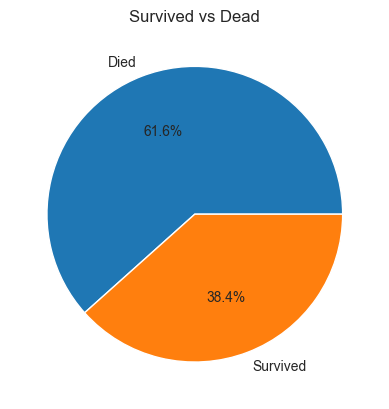

In [6]:
titanic.groupby("Survived").size().plot(kind="pie", labels=["Died", "Survived"], autopct="%1.1f%%", title="Survived vs Dead")

На діаграмі видно, що 61.6% людей загинули під час катастрофи, і лише 38.4% вижили.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


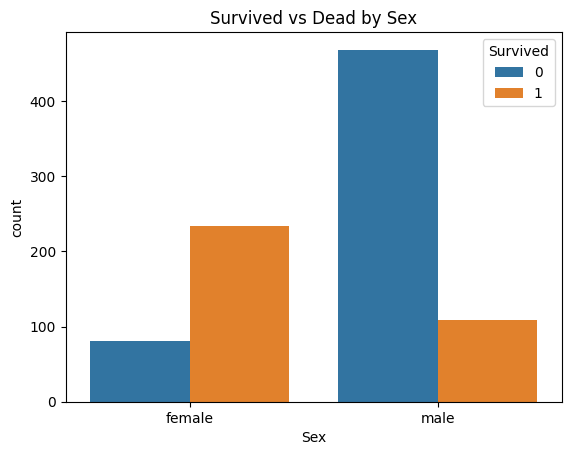

Text(0.5, 1.0, 'Survived vs Dead by Sex')

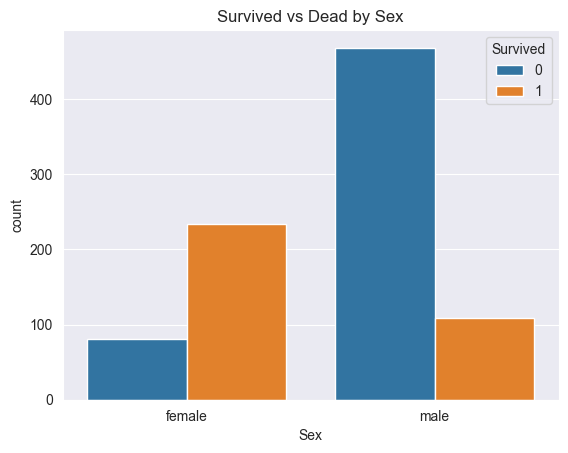

In [7]:
sns.countplot(titanic, x="Sex", hue="Survived", order=["female", "male"], hue_order=[0, 1]).set_title("Survived vs Dead by Sex")

Як бачимо з діаграми, більшість жінок пережили катастрофу, тоді як більшість чоловіків загинули. Це вказує на те, що пріорітетом був порятунок жінок.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

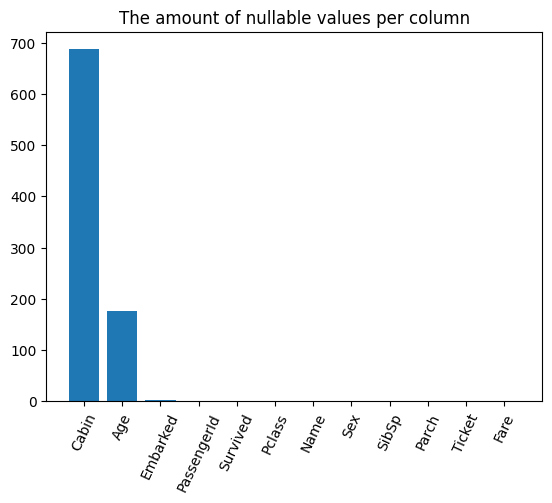

<Axes: title={'center': 'The amount of nullable values per column'}>

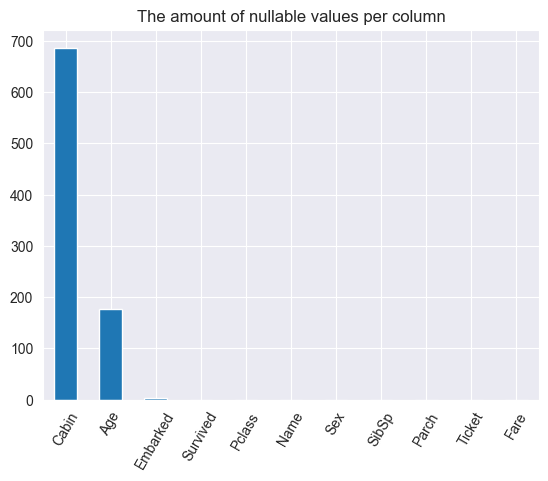

In [8]:
titanic.isna().sum().sort_values(ascending=False).plot(kind="bar", 
                                                       rot=60, 
                                                       title="The amount of nullable values per column")

З діаграми видно, що для великої кількості пасажирів невідомий номер каюти. Також, для частини пасажирів невідомий їх вік. Інші стовпчики майже повністю заповнені.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

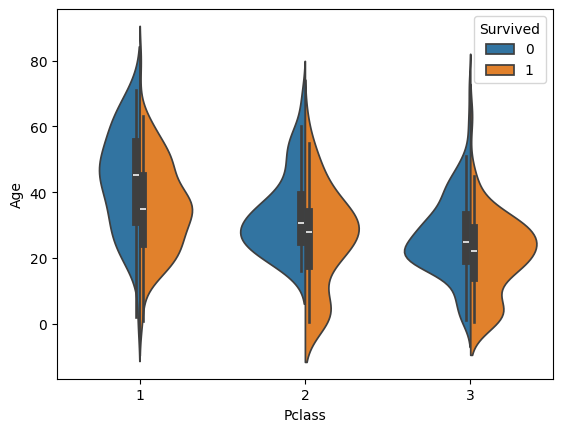

Text(0.5, 1.0, 'Age distribution by Pclass and Survived')

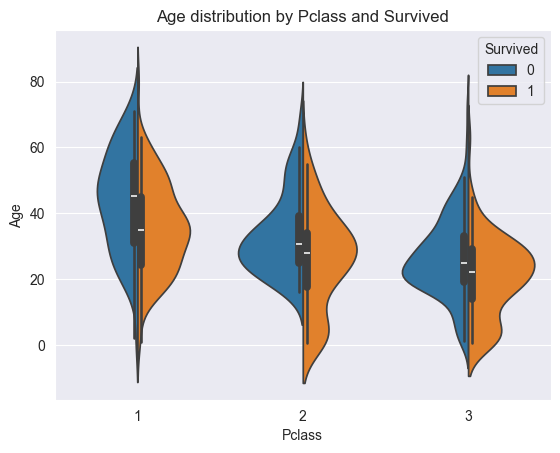

In [9]:
sns.violinplot(titanic, x="Pclass", y="Age", hue="Survived", split=True).set_title("Age distribution by Pclass and Survived")

На діаграмі відображено розподіл віку за класом квитку і виживанням.

З цієї діаграми можна зробити кілька висновків:
1. Чим старші люди, тим кращий клас квитків у них був.
2. Перевага у порятунку надавалася молодшим людям, зокрема дітям.

Діаграма саме у такому вигляді не показує ще однієї важливої динаміки: вплив класу квитка на те, чи виживе людина. Так відбувається через те, що усі частини графіка нормалізовані за площею(мають однакову площу), а отже ніяк не репрезентують кількість загиблих/виживших. 

Для відображення і цієї динаміки, наступний графік буде кращим:

Text(0.5, 1.0, 'Age distribution by Pclass and Survived')

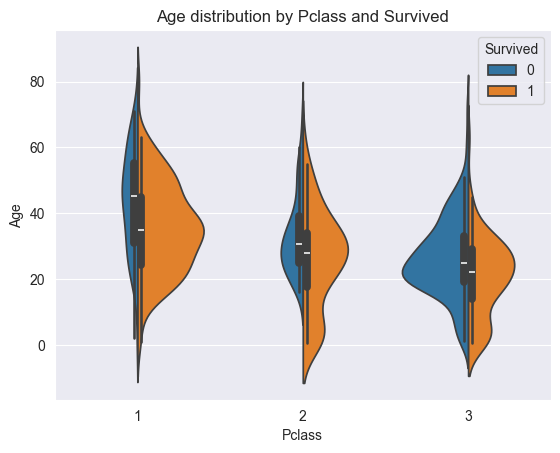

In [10]:
sns.violinplot(titanic, x="Pclass", y="Age", hue="Survived", split=True, density_norm="count").set_title("Age distribution by Pclass and Survived")

Тут вже чітко видно, що пріорітетний порятунок надавався 1, потім 2, а потім 3 класу. Також актуальними є й 2 попередні висновки.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


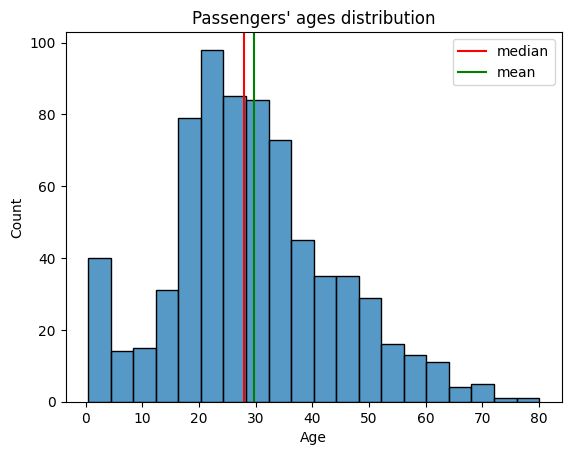

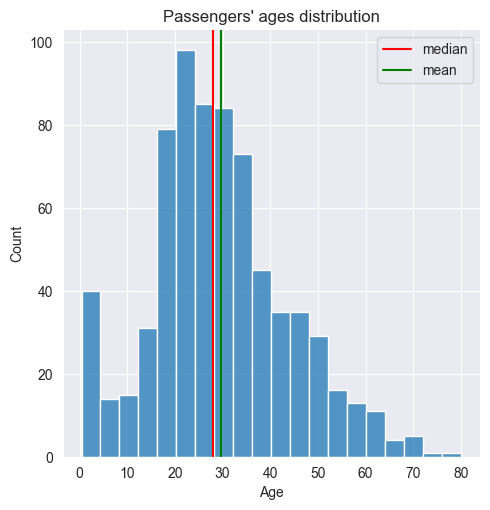

In [11]:
sns.displot(titanic, x="Age")
plt.title("Passengers' ages distribution")
plt.axvline(x=titanic["Age"].median(), color="red", label="median")
plt.axvline(x=titanic["Age"].mean(), color="green", label="mean")
plt.legend(["median", "mean"])

З отриманої діаграми видно, що середній вік пасажирів близький до медіани, і рівний приблизно 30 рокам. Більшість пасажирів знаходяться в діапазоні від 15 до 40 років. Також на борту було багато дітей до 5 років, але не так багато від 5 до 15.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Яким чином кількість родичів впливає на виживання?

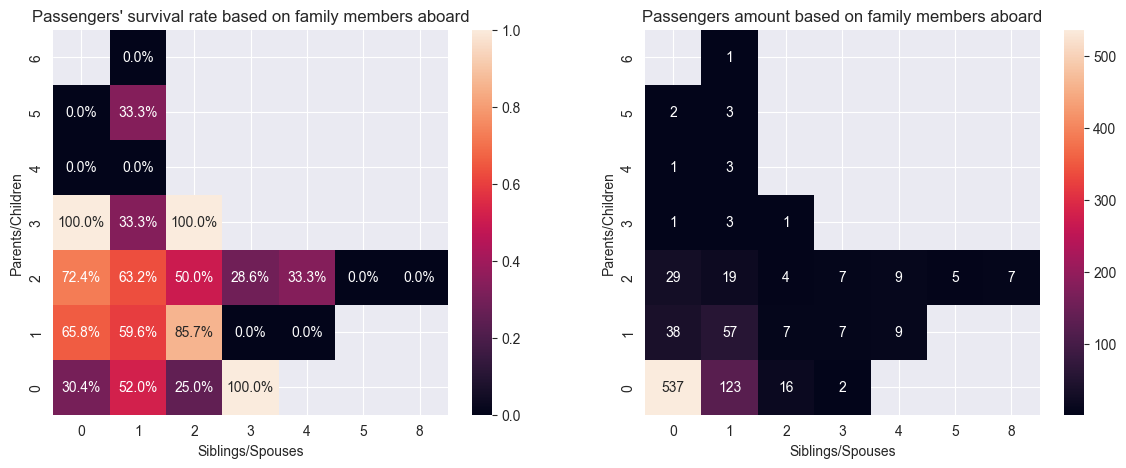

In [12]:
titanic_heat = titanic.groupby(["Parch", "SibSp"], as_index=False)["Survived"].mean()
titanic_count = titanic.groupby(["Parch", "SibSp"], as_index=False).size()
fig, (heat_ax, count_ax) = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(titanic_heat.pivot(index="Parch", columns="SibSp", values="Survived"), annot=True, fmt=".1%", ax=heat_ax)
sns.heatmap(titanic_count.pivot(index="Parch", columns="SibSp", values="size"), annot=True, fmt=".0f", ax=count_ax)
heat_ax.invert_yaxis()
heat_ax.set(xlabel="Siblings/Spouses", ylabel="Parents/Children")
count_ax.invert_yaxis()
count_ax.set(xlabel="Siblings/Spouses", ylabel="Parents/Children")
heat_ax.title.set_text("Passengers' survival rate based on family members aboard")
count_ax.title.set_text("Passengers amount based on family members aboard")

Як бачимо з правої діаграми, для прикладів які виходять за 1 по осі x та за 2 по осі y занадто мало даних, тому висновки з даних за цими межами робити неможливо. Знаючи це, розглянемо ліву діаграму. На тих 6 квадратах, які мають більш-менш якісні дані(0-1 по осі x та 0-2 по осі y), помітна чітка залежність між виживанням та кількістю батьків/дітей: чим більше батьків/дітей тим більше шансів вижити. Щодо братів/сестер/дружин/чоловіків, то тут тенденція нечітка: якщо немає батьків/дітей, то приріст до шансів на виживання дуже високий, але коли є батьки/діти, то шанси навпаки - зменшуються.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

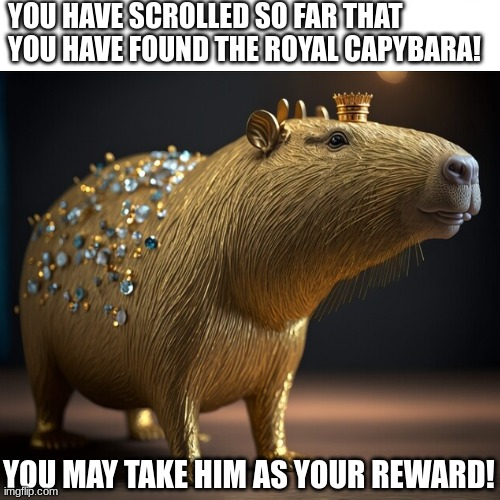